In [1]:
%matplotlib inline



Bilateral filter
----------------

A bilateral filter is an edge-preserving and noise reducing filter. It averages
pixels based on their spatial closeness and radiometric similarity.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

from skimage.restoration import denoise_bilateral


original1 = misc.imread('Data/dataset1_img_hip.png')[:, :, 0]
denoised1 = denoise_bilateral(original1, sigma_color=0.08, sigma_spatial=15, multichannel=False)

original2 = misc.imread('Data/dataset2_img_heart.png')[:, :, 0]
denoised2 = denoise_bilateral(original2, sigma_color=0.08, sigma_spatial=15, multichannel=False)


print(original1.shape, original1.dtype)
print(original2.shape, original2.dtype)

((585, 634), dtype('uint8'))
((512, 512), dtype('uint8'))


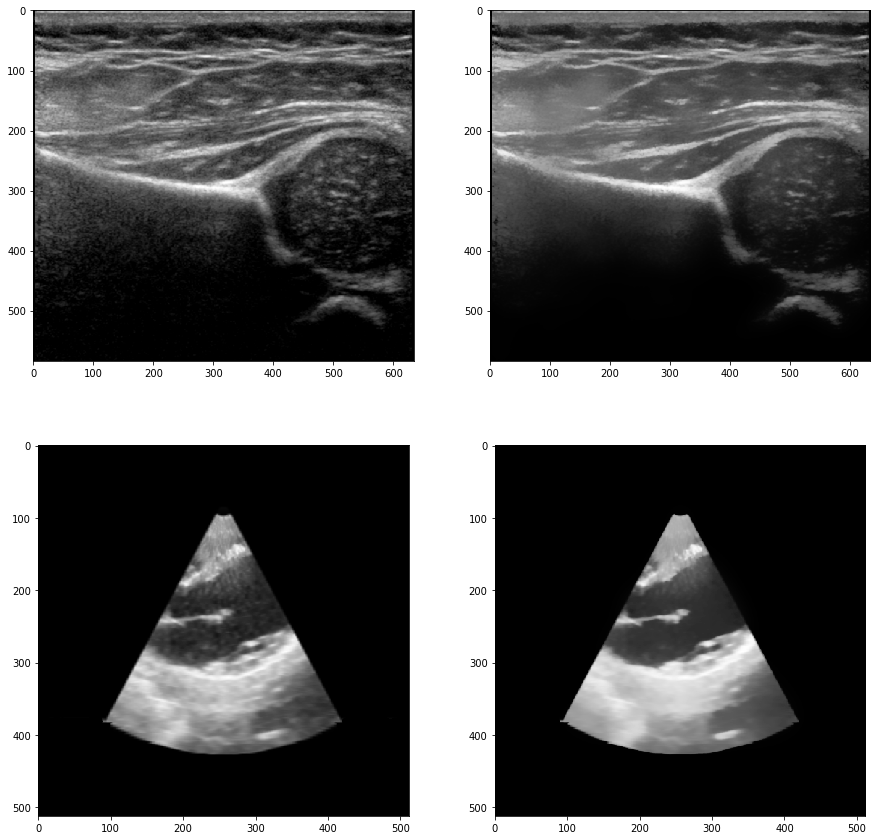

In [3]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 15)

plt.gray()

axs[0, 0].imshow(original1)
axs[0, 1].imshow(denoised1)
axs[1, 0].imshow(original2)
axs[1, 1].imshow(denoised2)

plt.show()

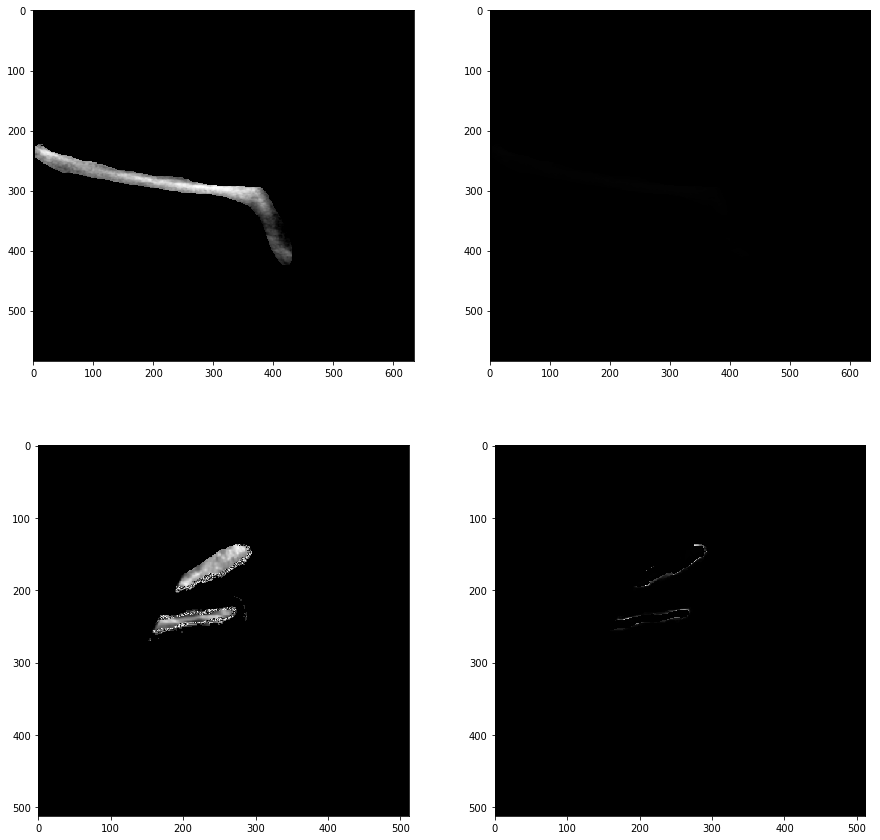

In [8]:
# Compute measurement / quantity showing enhancement

mask1 = misc.imread('Data/dataset1_mask_hip.png')[:, :, 0]
mask2 = misc.imread('Data/dataset2_mask_heart.png')[:, :, 0]

# convert grayscale 0-255 to a binary mask 0,1
mask1[mask1 == 255] = 1.0
mask2[mask2 == 255] = 1.0

# np.set_printoptions(threshold=np.nan)
orig_masked1 = np.multiply(original1, mask1)
orig_masked2 = np.multiply(original2, mask2)

res_masked1 = np.multiply(denoised1, mask1)
res_masked2 = np.multiply(denoised2, mask2)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 15)

plt.gray()

axs[0, 0].imshow(orig_masked1)
axs[0, 1].imshow(res_masked1)
axs[1, 0].imshow(orig_masked2)
axs[1, 1].imshow(res_masked2)

plt.show()